# Laboratorium 3 - Metoda wektorów wspierających SVM



### Wczytanie danych

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [171]:
flame = pd.read_csv('data/flame.txt', header=None, delimiter='\t')
flame.head()

,0,1,2
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2


In [172]:
jain = pd.read_csv('data/jain.txt', header=None, delimiter='\t')
jain.head()

,0,1,2
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2


In [217]:
def show(df,title="null"):
    class1 = df[df[2] == 1]
    class2 = df[df[2] == 2]

    plt.scatter(class1[0], class1[1], color='red', label='1')
    plt.scatter(class2[0], class2[1], color='blue', label='2')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.savefig(f"graphs/{title}")
    plt.show()

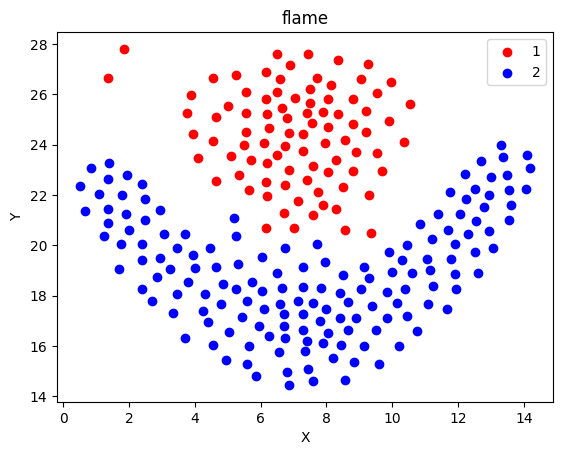

In [218]:
show(flame,"flame")

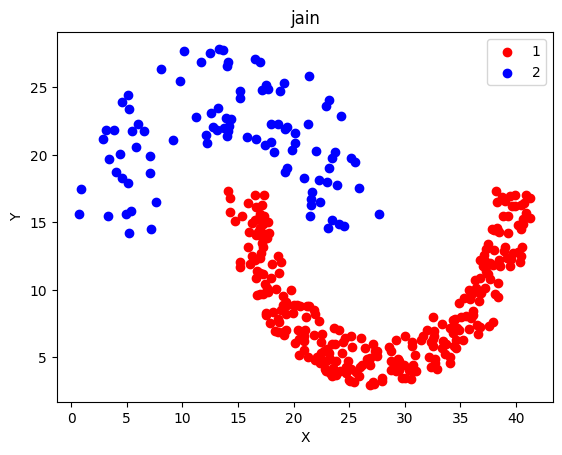

In [219]:
show(jain,"jain")

## Liniowy SVM

In [352]:
def linearSVM(ds,parameter_C):
    X = ds[[0,1]].values
    y = ds[2].values
    X = StandardScaler().fit_transform(X)
    clf = SVC(kernel="linear", C=parameter_C)
    clf.fit(X, y)
    return clf

In [409]:
def show_linearSVM(ds,parameter_C,data_name):

    clf = linearSVM(ds,parameter_C)

    X = ds[[0,1]].values
    y = ds[2].values
    X = StandardScaler().fit_transform(X)

    plt.figure(figsize=(27, 15))
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=100),
                            np.linspace(y_min, y_max, num=100))
    
    cm = plt.cm.RdBu
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=1,levels=80)

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='green', linewidths=7, label='Wektory wspierające')

    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', s=100, c='r', label='Klasa 1')
    plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], marker='o', s=100, c='b', label='Klasa 2')

    w = clf.coef_[0]
    b = clf.intercept_[0]
    x_decision_boundary = np.array([x_min, x_max])
    y_decision_boundary = (-w[0] / w[1]) * x_decision_boundary - (b / w[1])

    plt.plot(x_decision_boundary, y_decision_boundary, 'k-', linewidth=2,label='Granica decyzyjna')


    plt.legend(fontsize=20)
    plt.xlabel('X',fontsize=20)
    plt.ylabel('Y',fontsize=20)
    plt.title(f'Linear SVM -> data:"{data_name}", c={parameter_C}',fontsize=20)
    plt.savefig(f"graphs/lin_{data_name}_{int(parameter_C*100)}")
    plt.show()

In [355]:
def test_linearSVM(ds,title):
    margins=[]
    parametersC=[i/100 for i in range(1,1000)]
    for c in parametersC:
        clf = linearSVM(ds,c)
        margins.append(2 / np.linalg.norm(clf.coef_[0]))

    plt.figure(figsize=(15, 8))
    plt.semilogy(parametersC,margins)
    plt.title('Zależność szerokości marginesu od parametru C')
    plt.xlabel('Wartość parametru C')
    plt.ylabel('Szerokość marginesu')
    plt.grid(True)
    plt.savefig(f"graphs/{title}_C")
    plt.show()

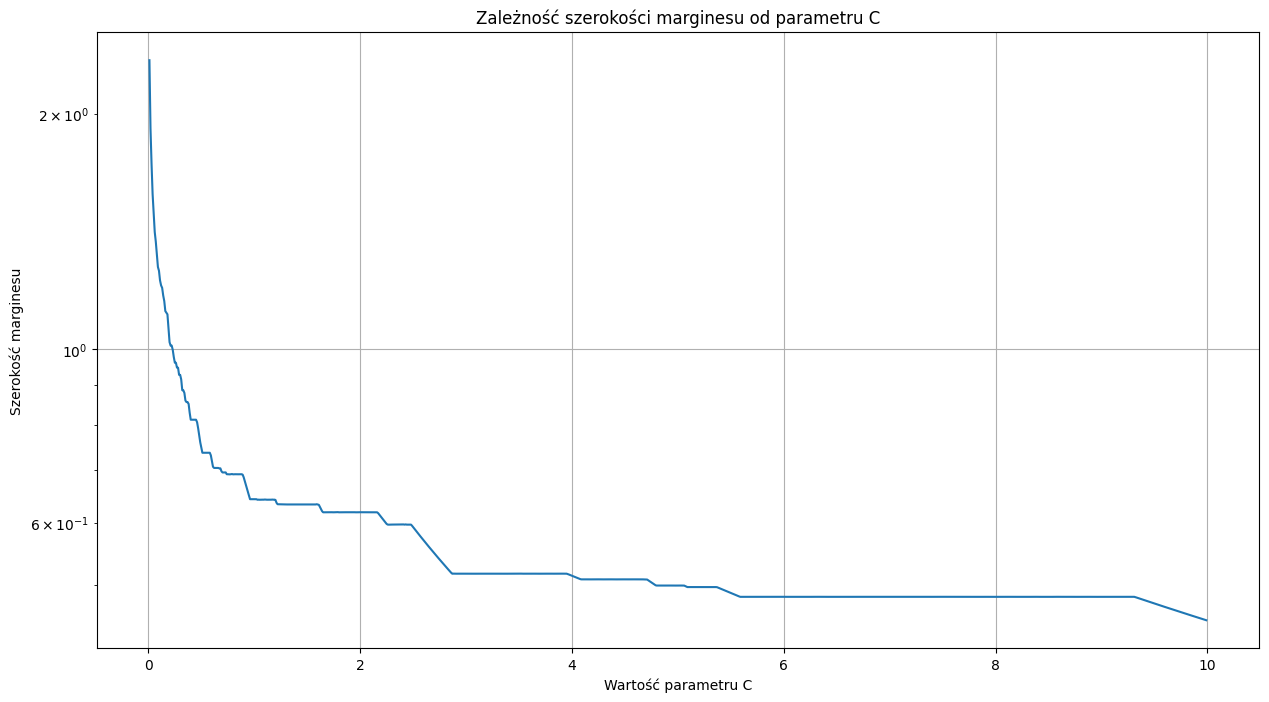

In [336]:
test_linearSVM(jain,"jain")

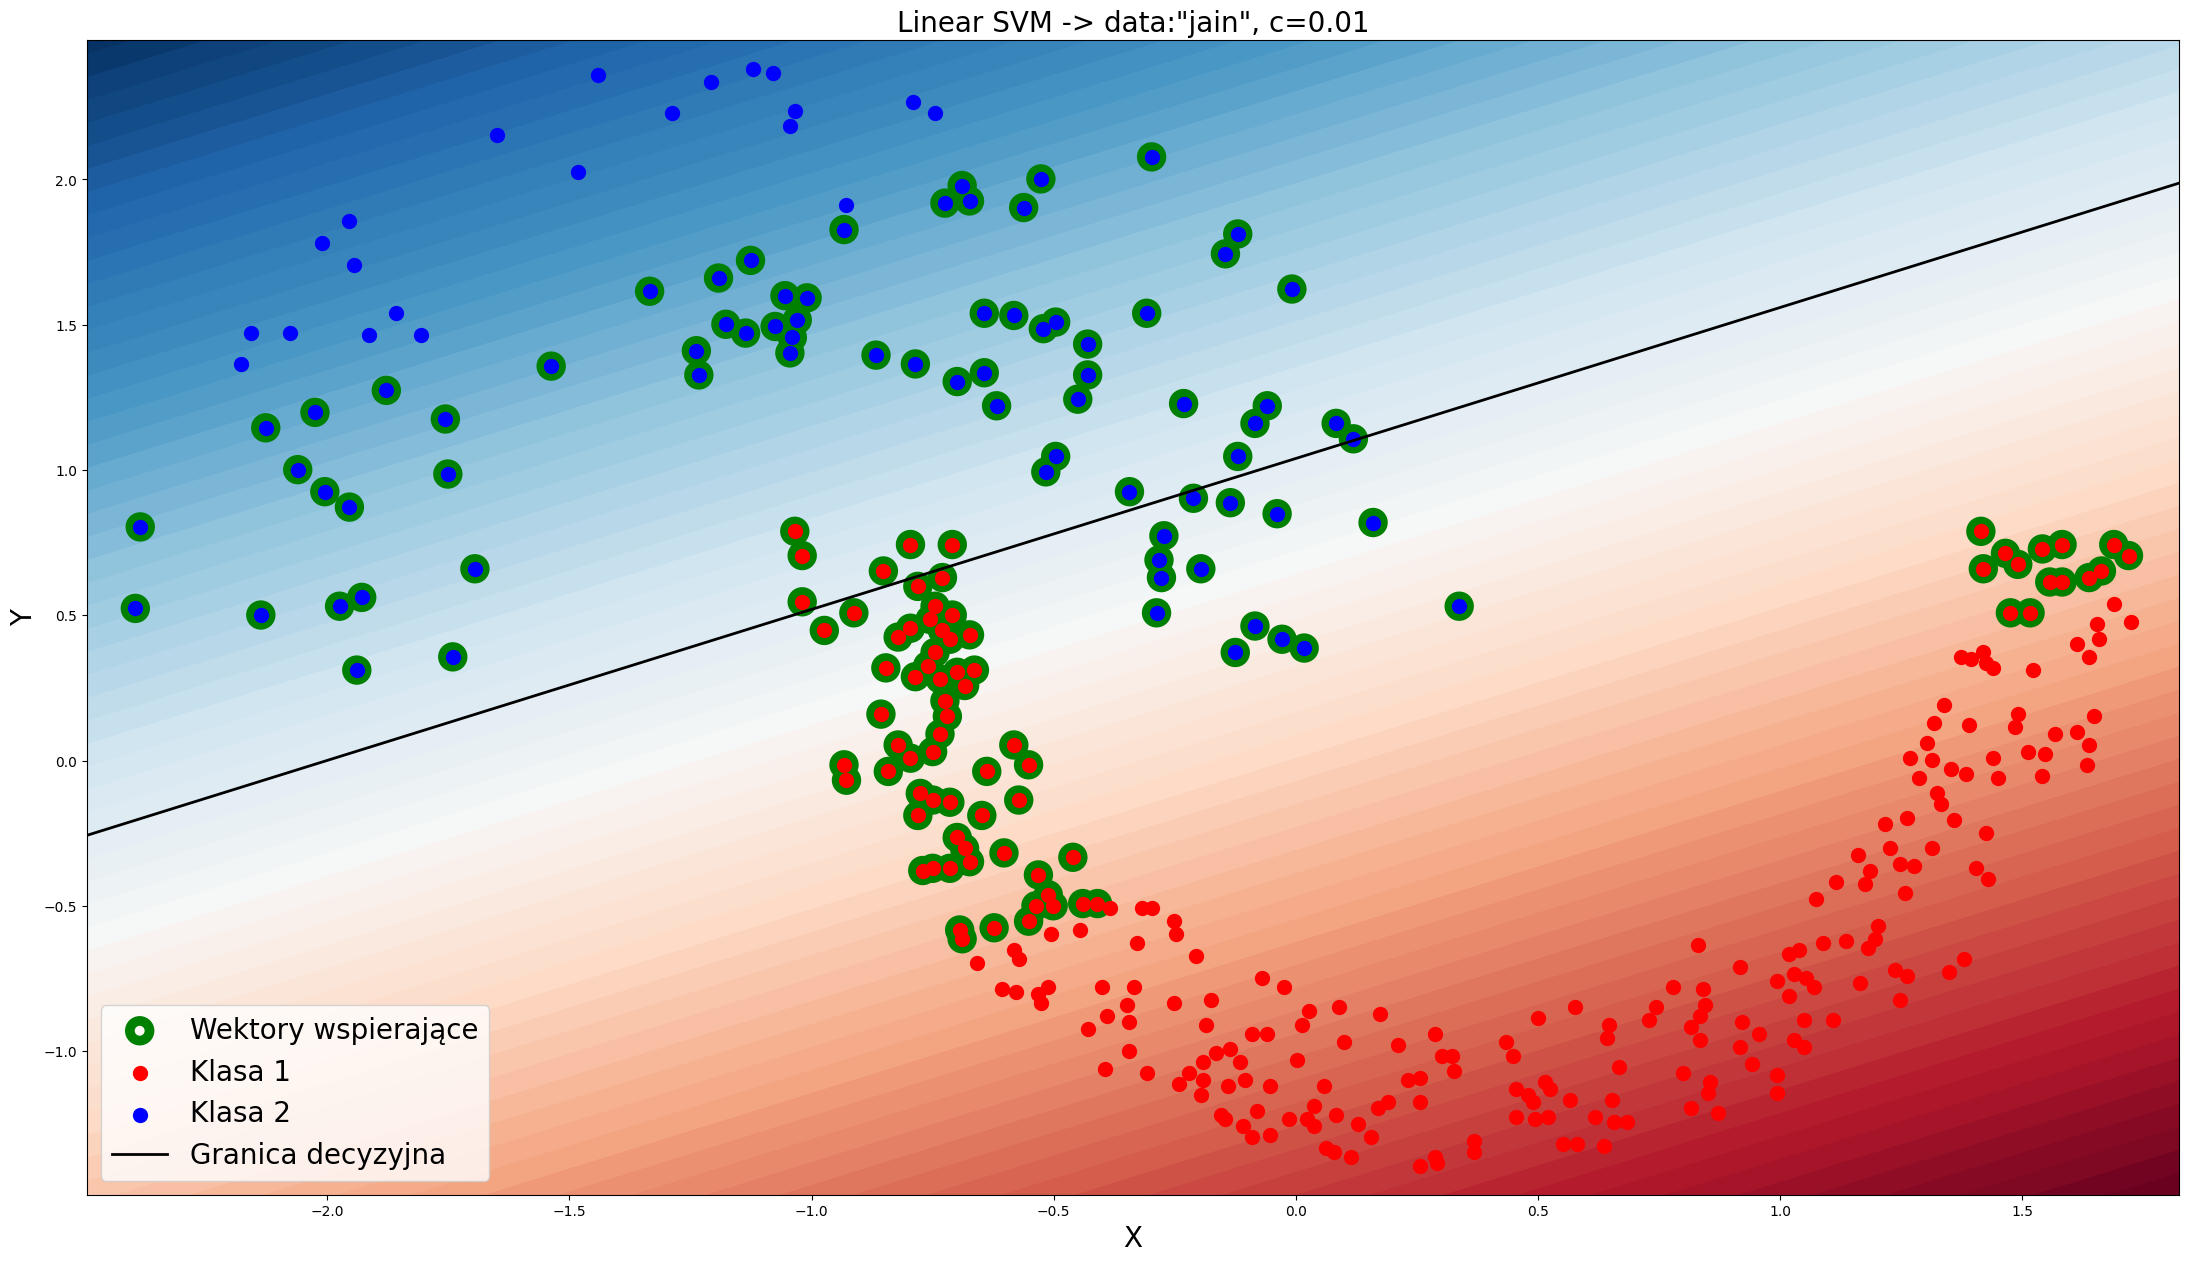

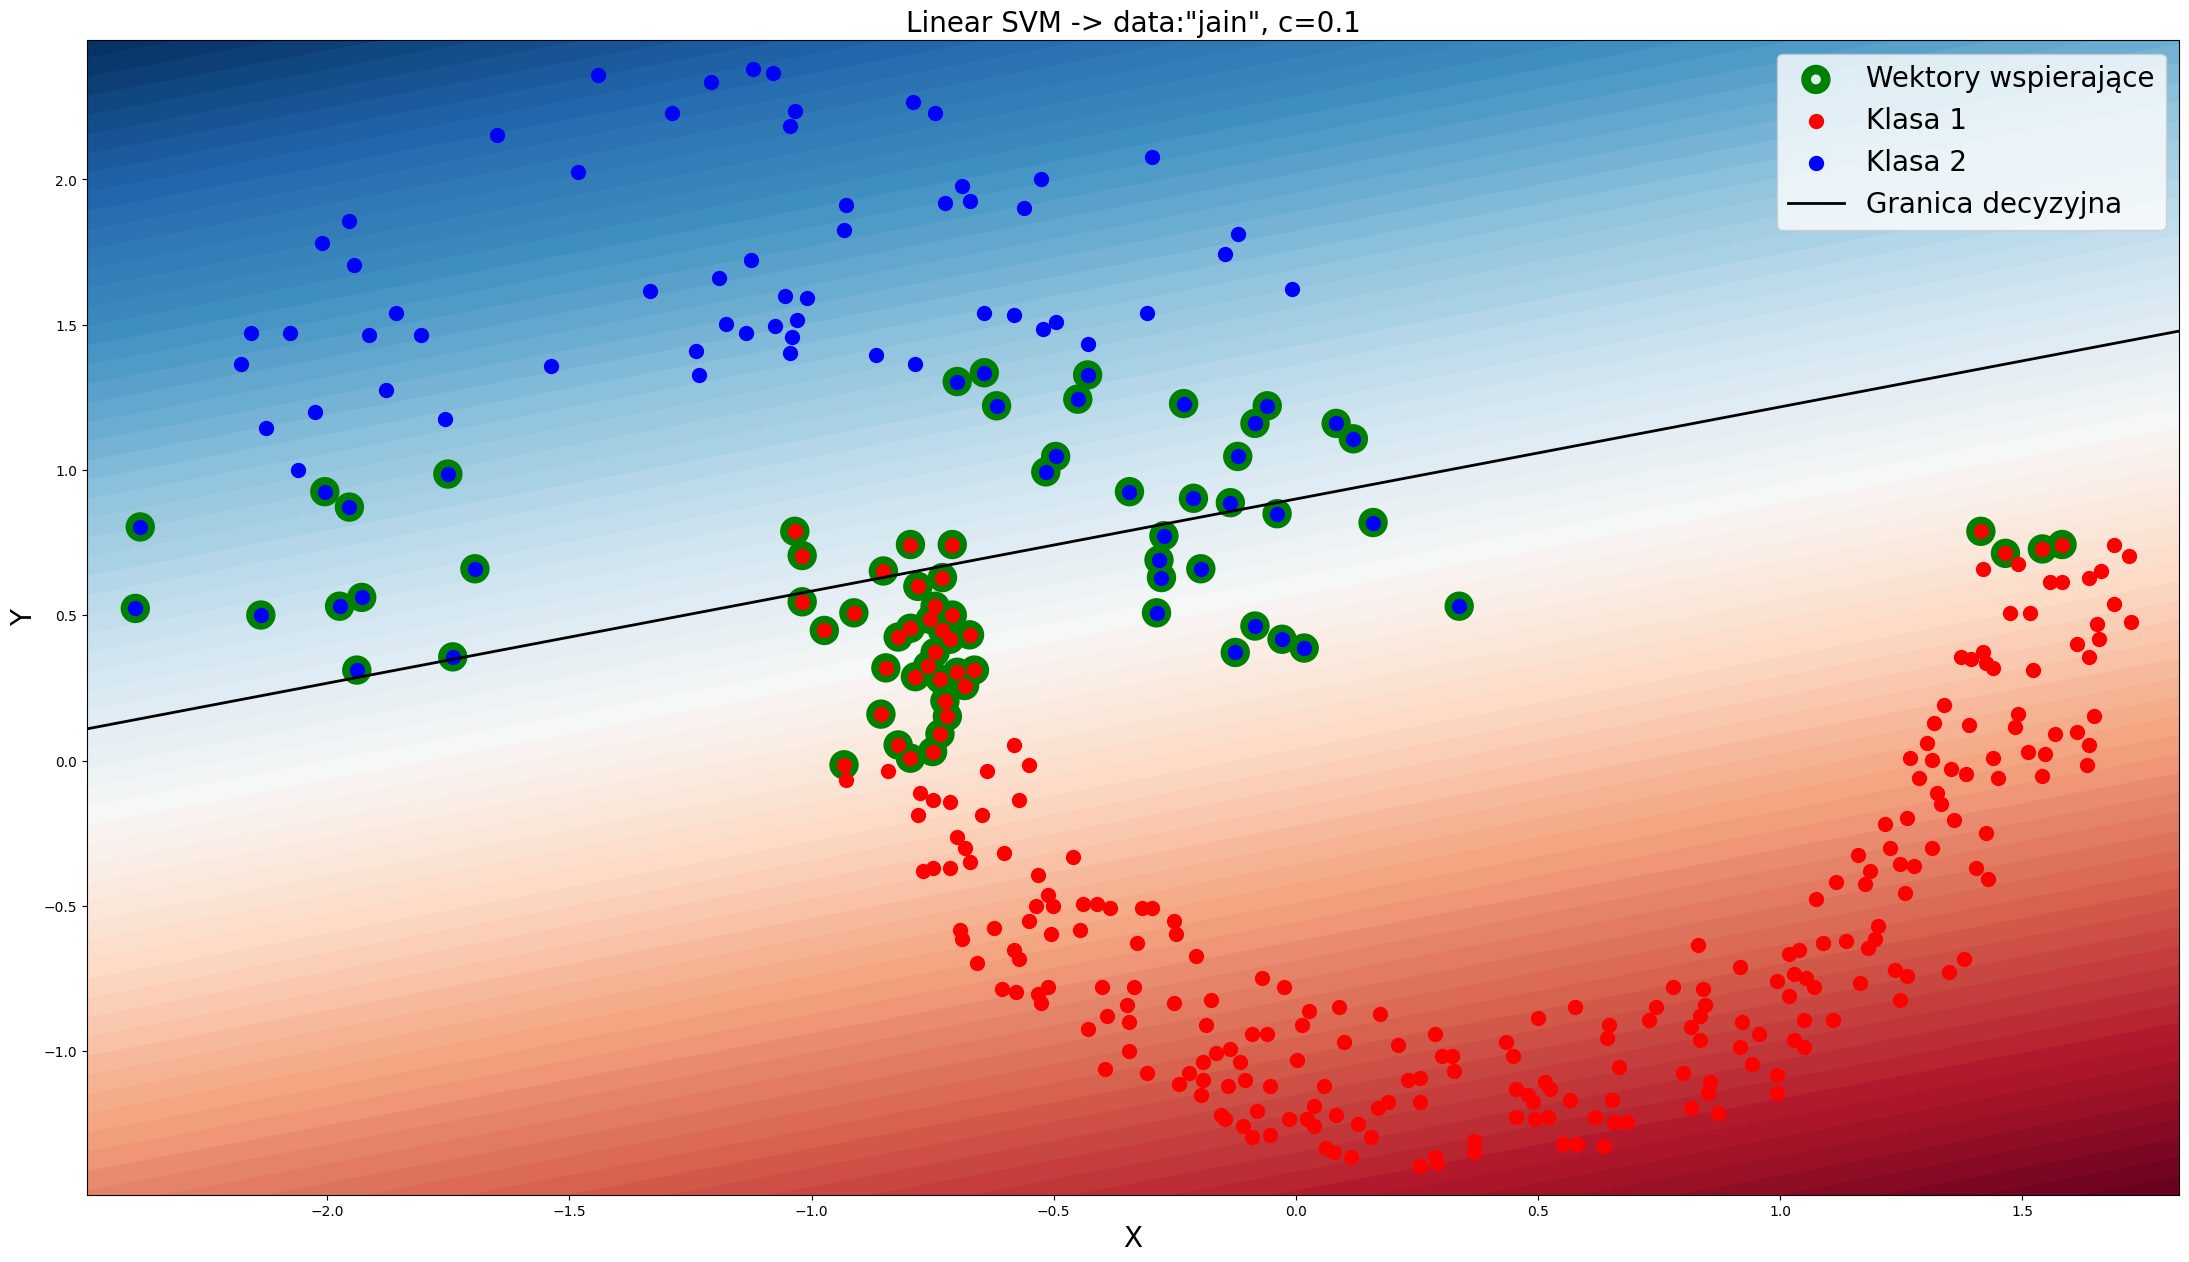

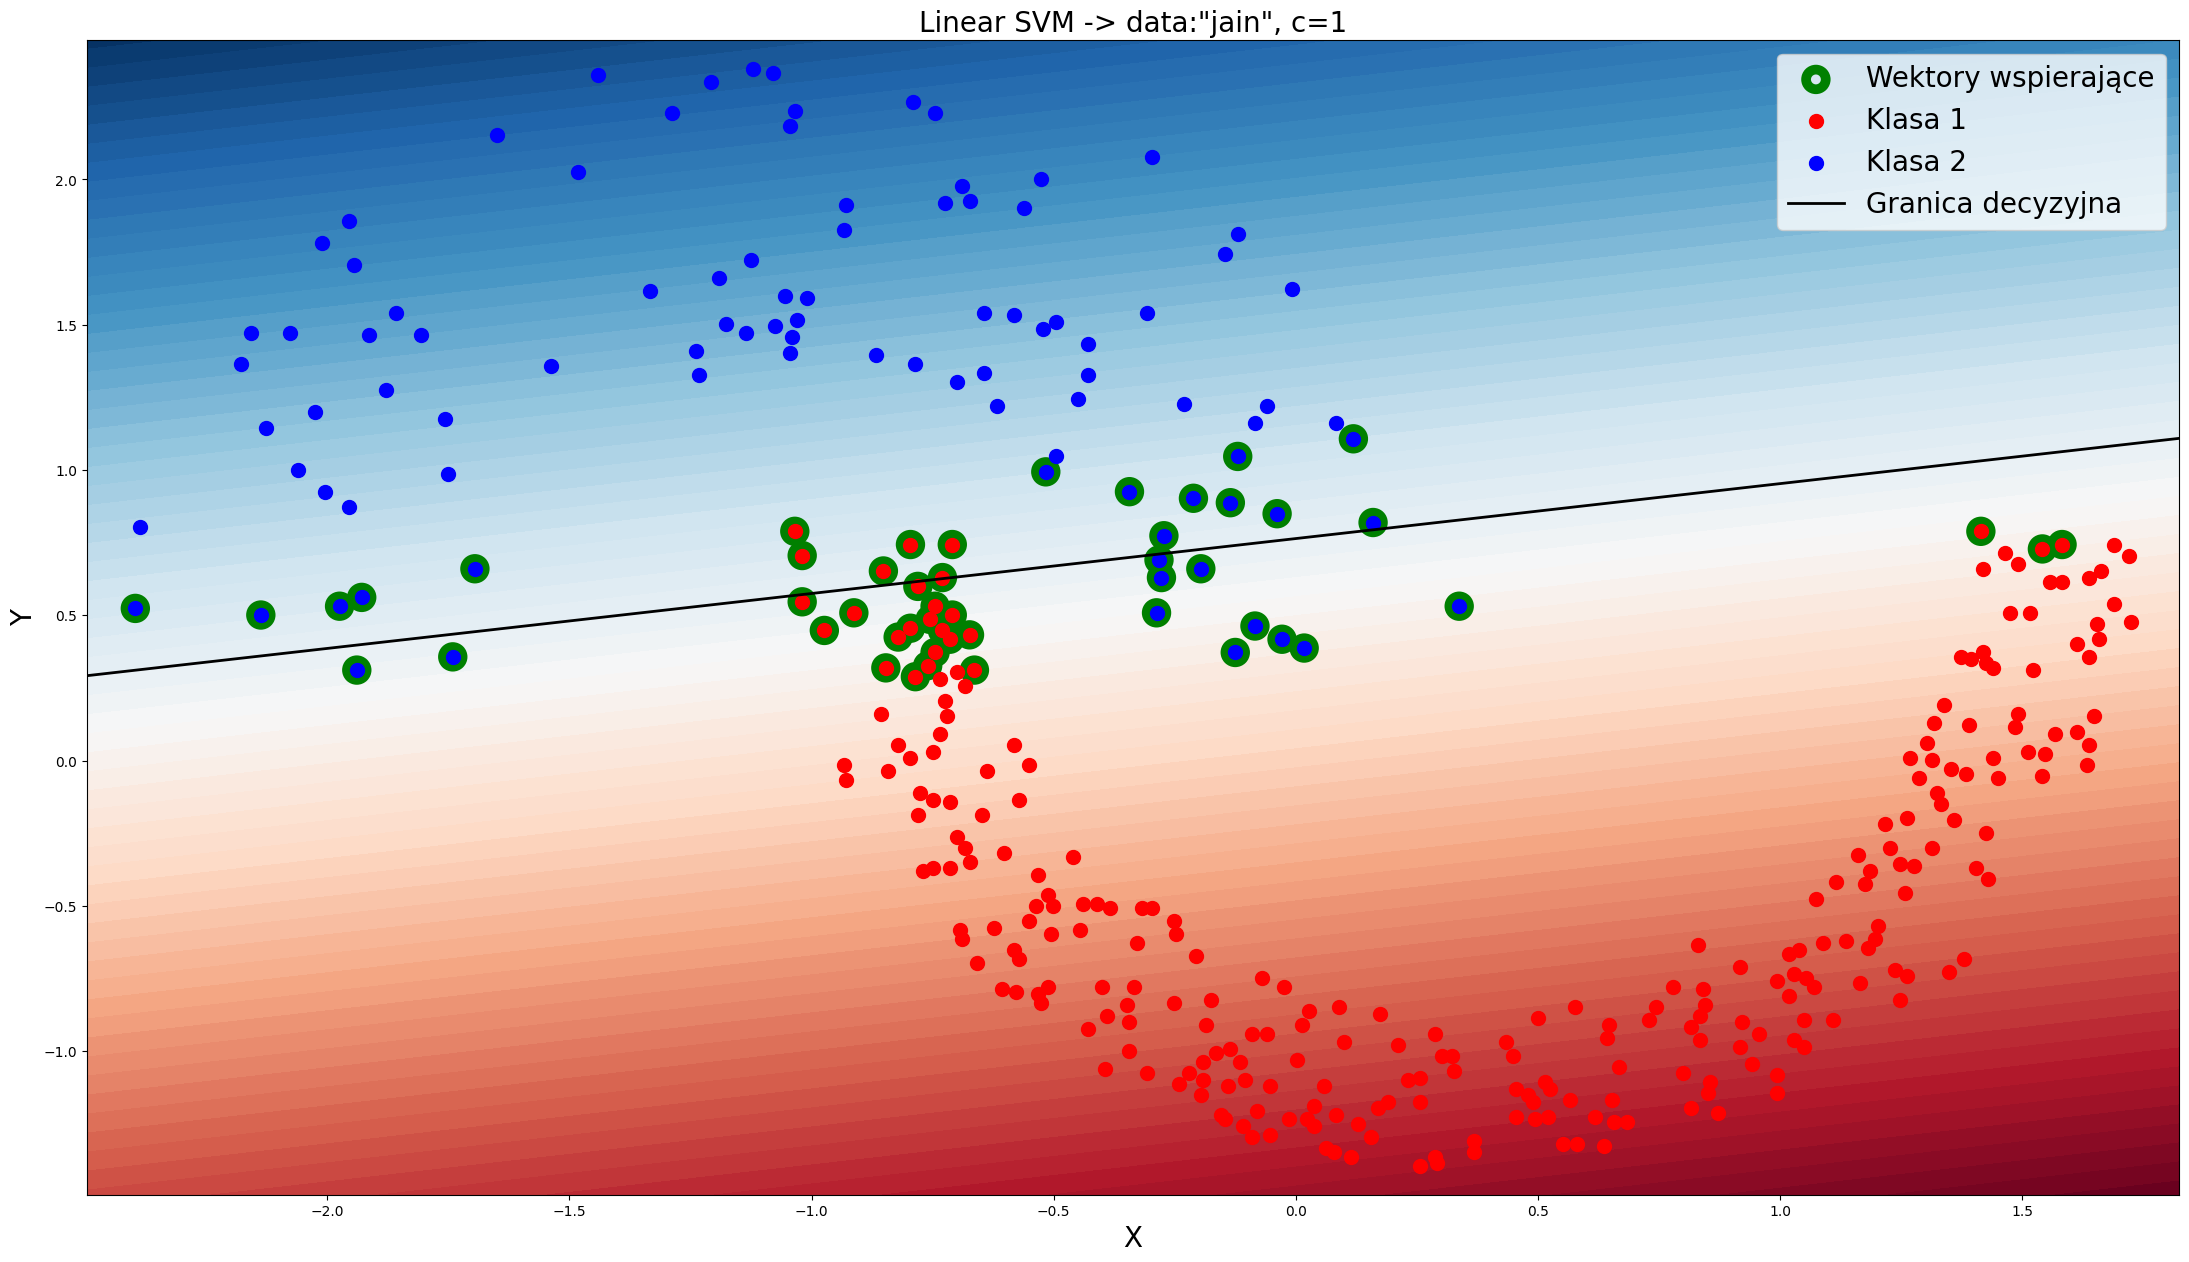

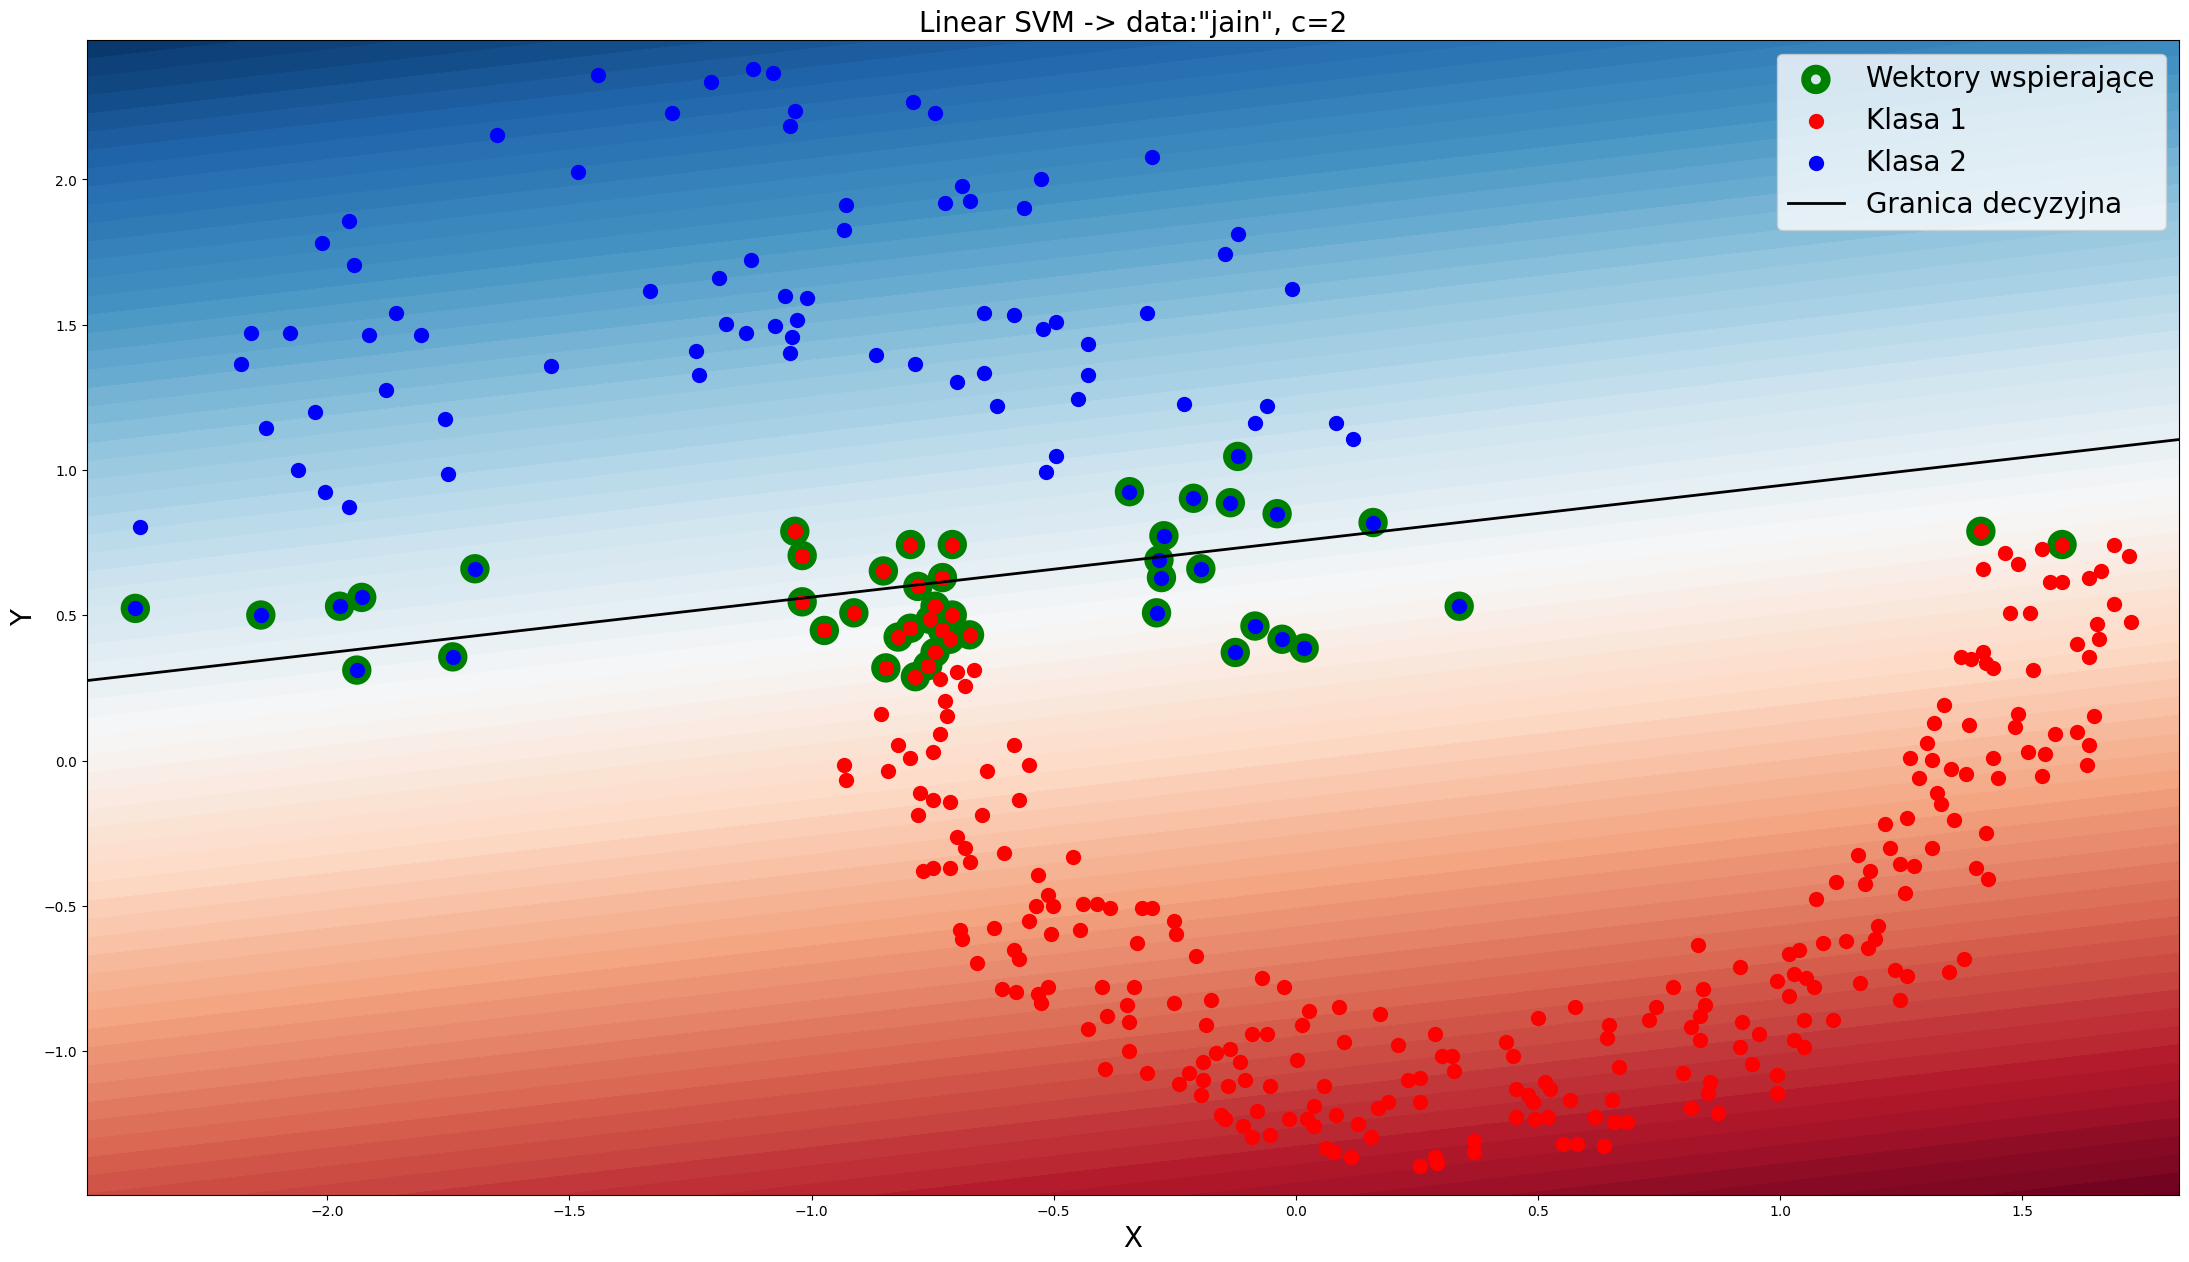

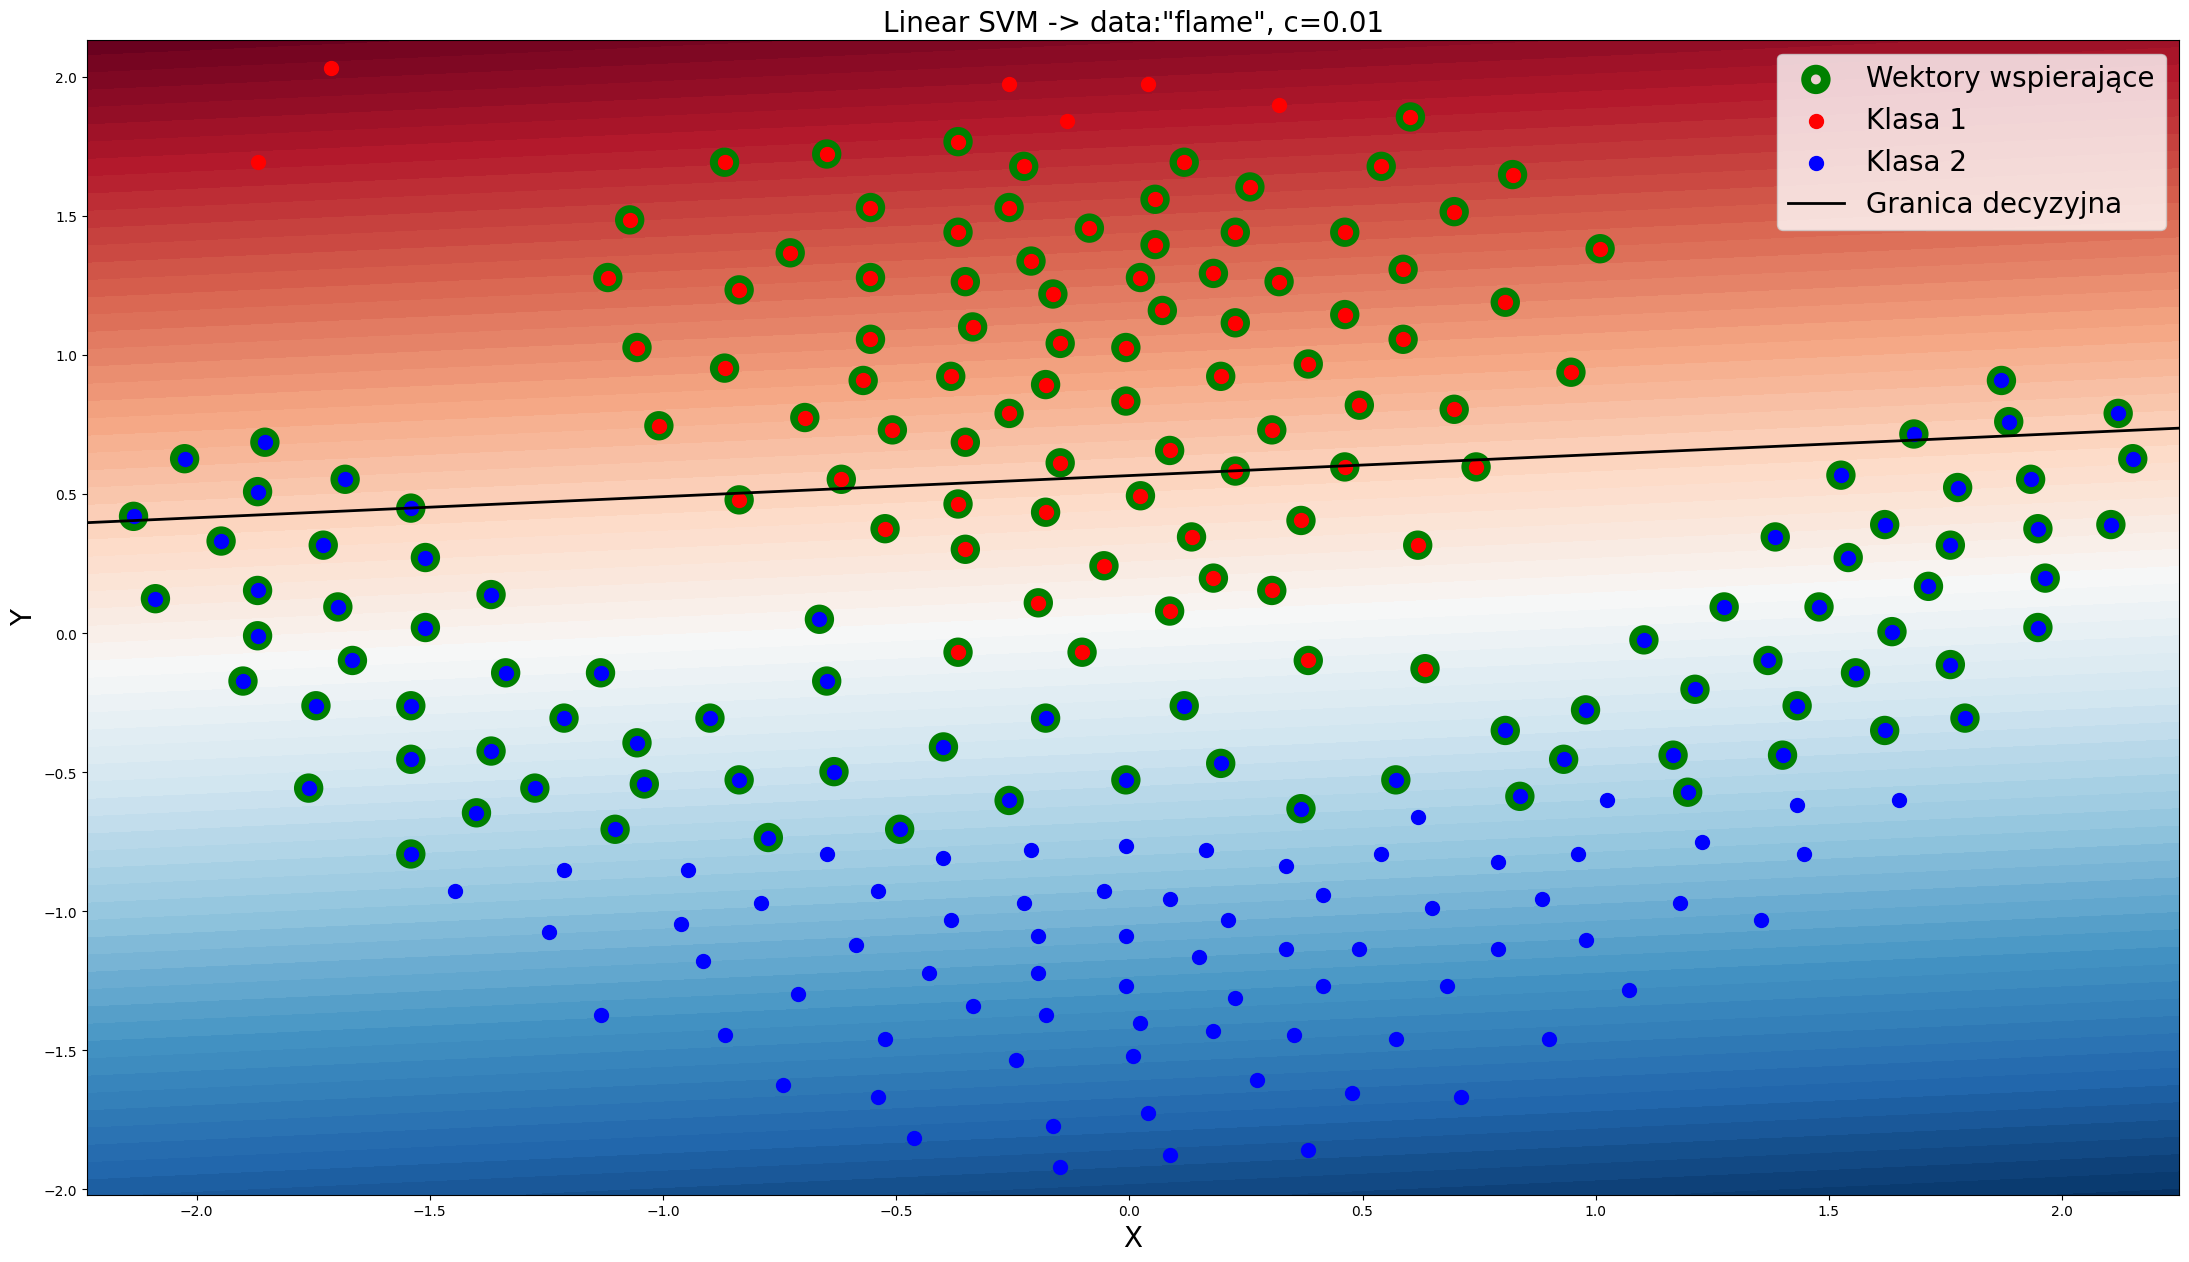

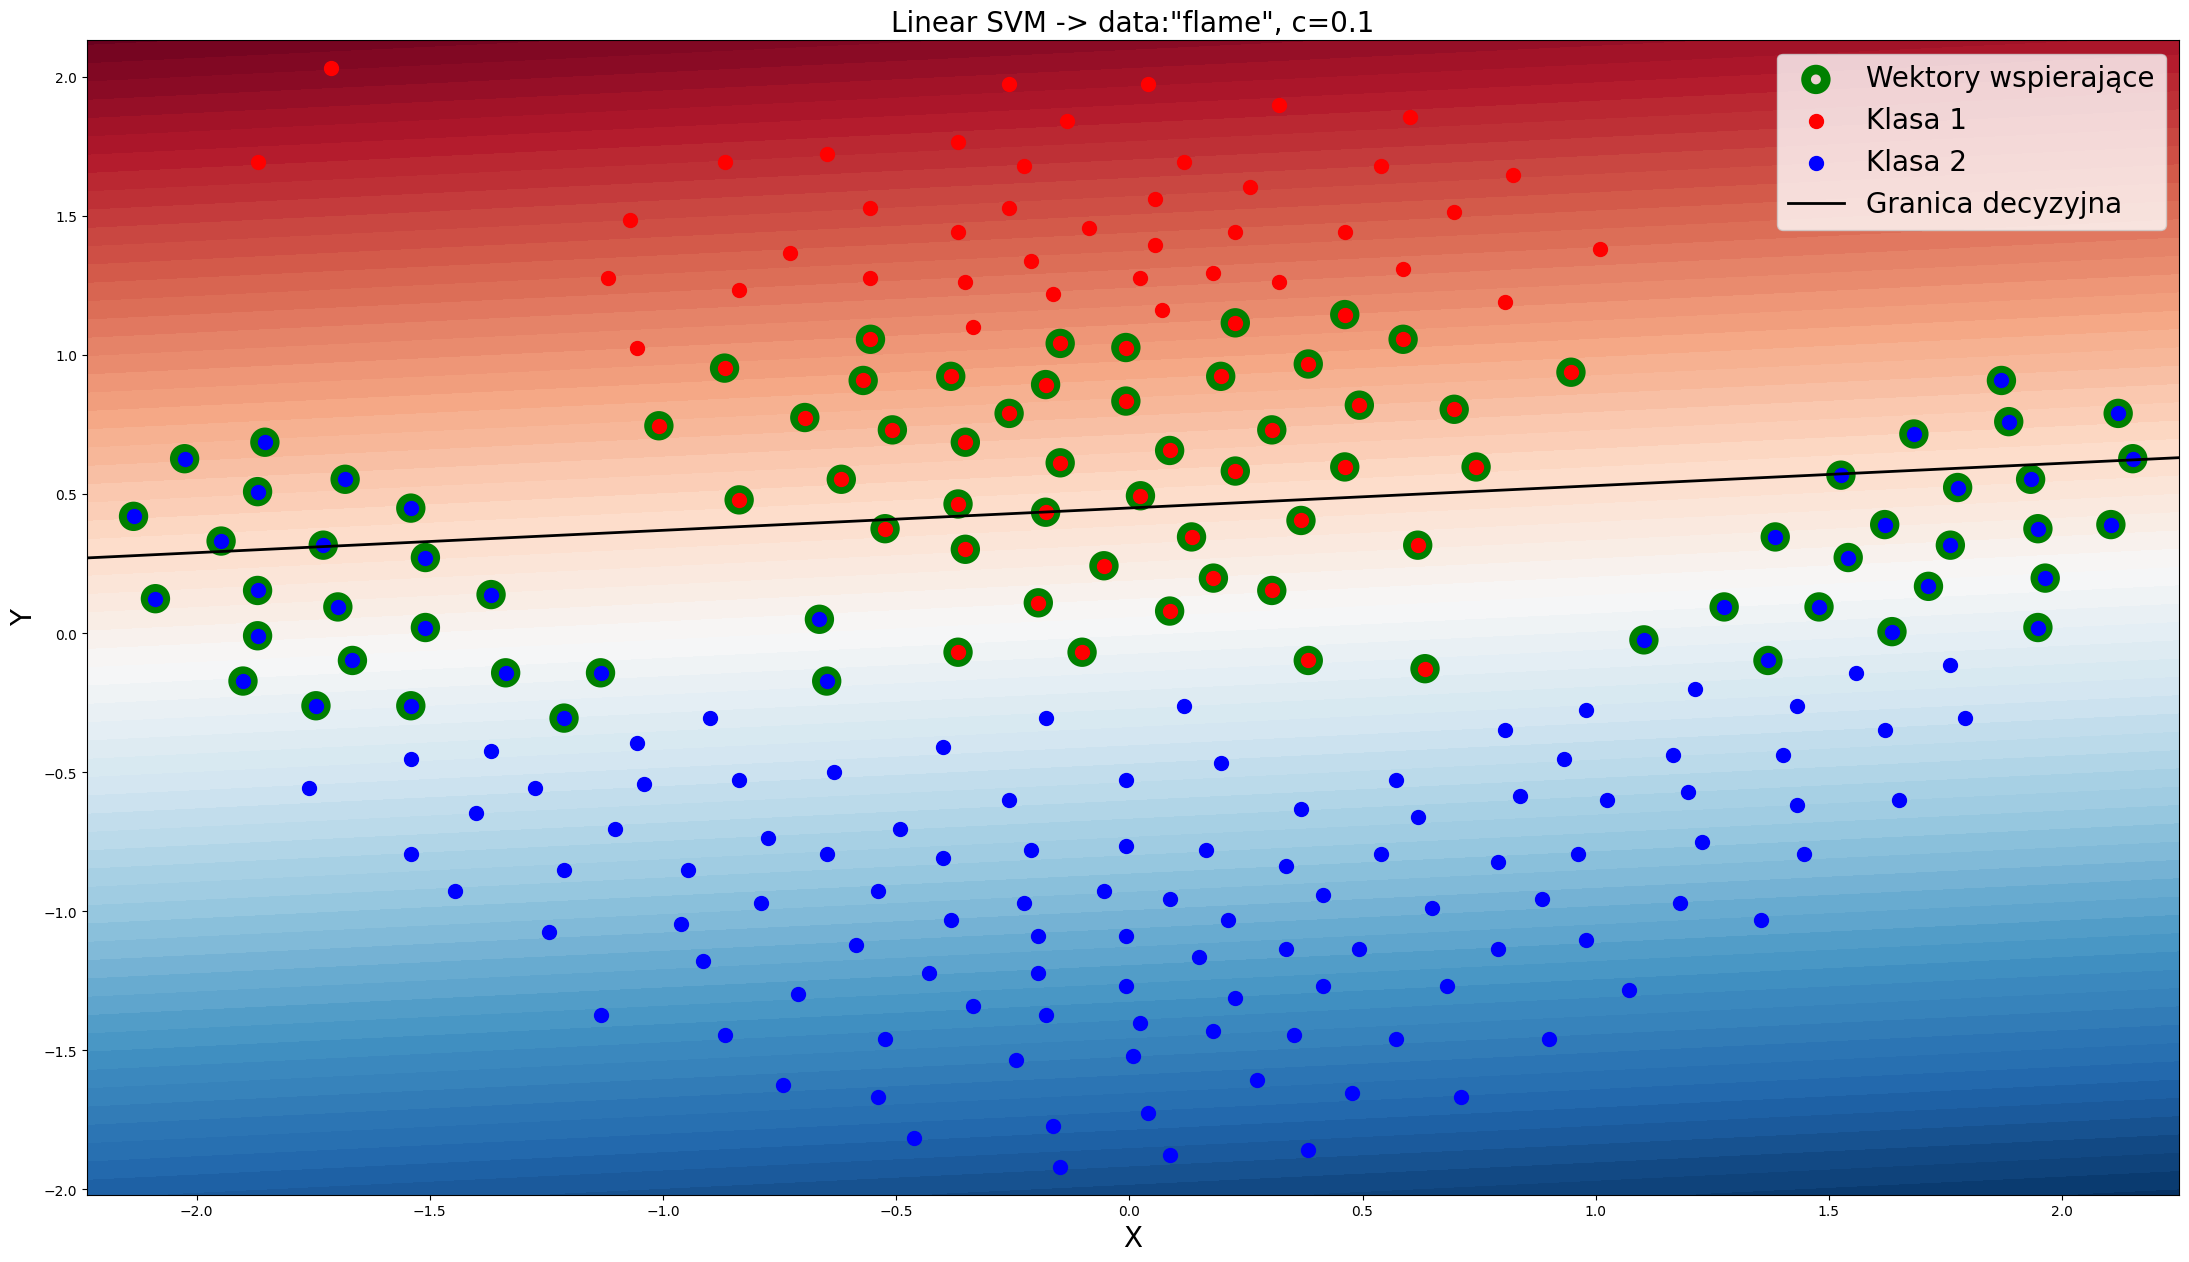

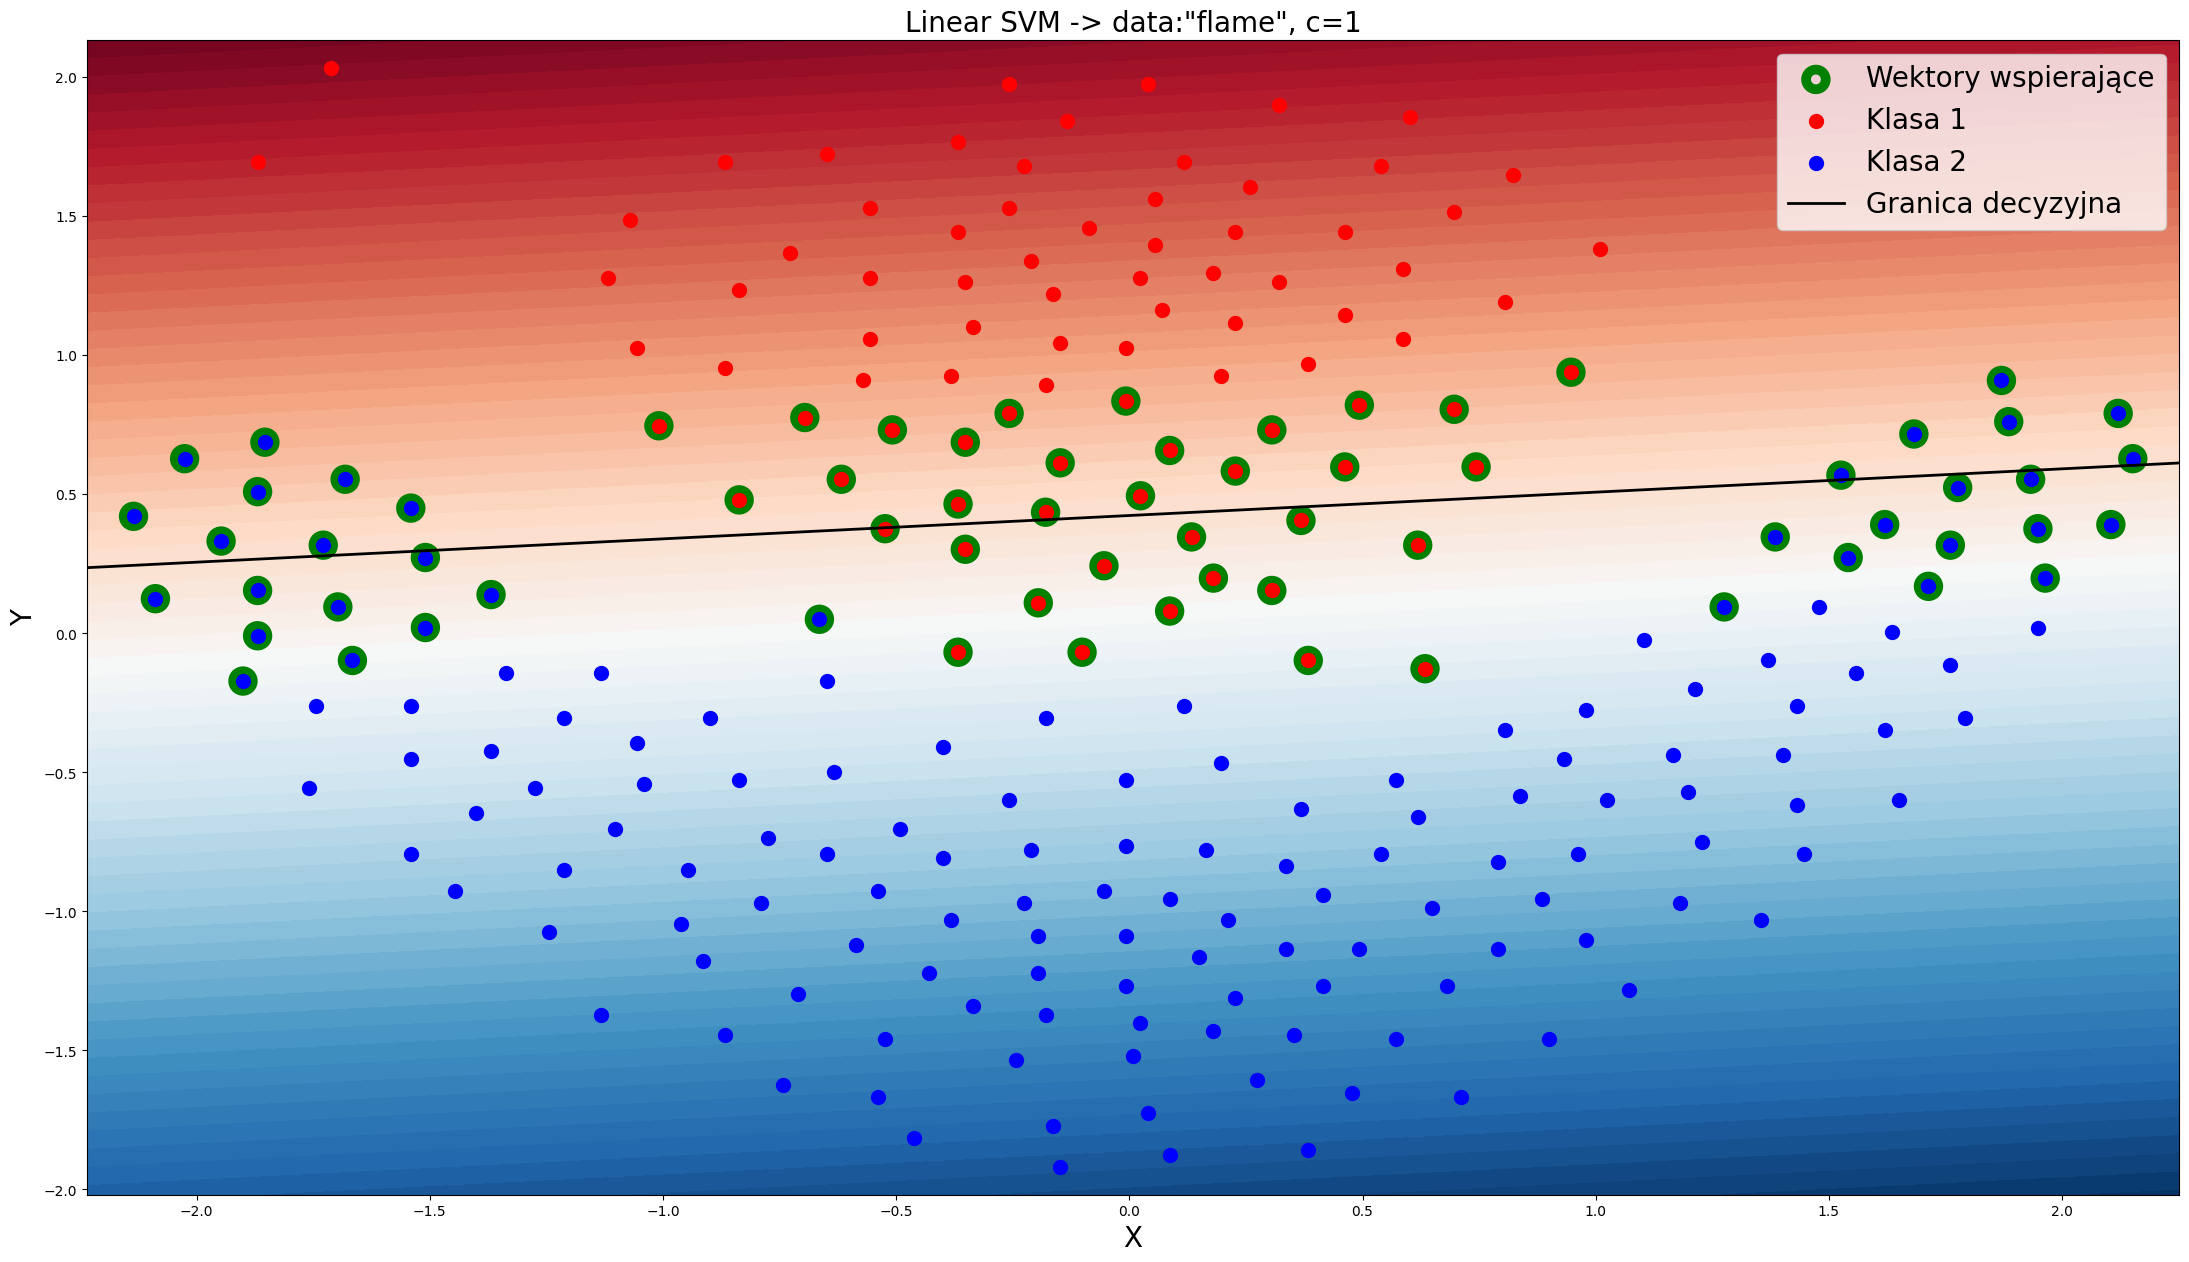

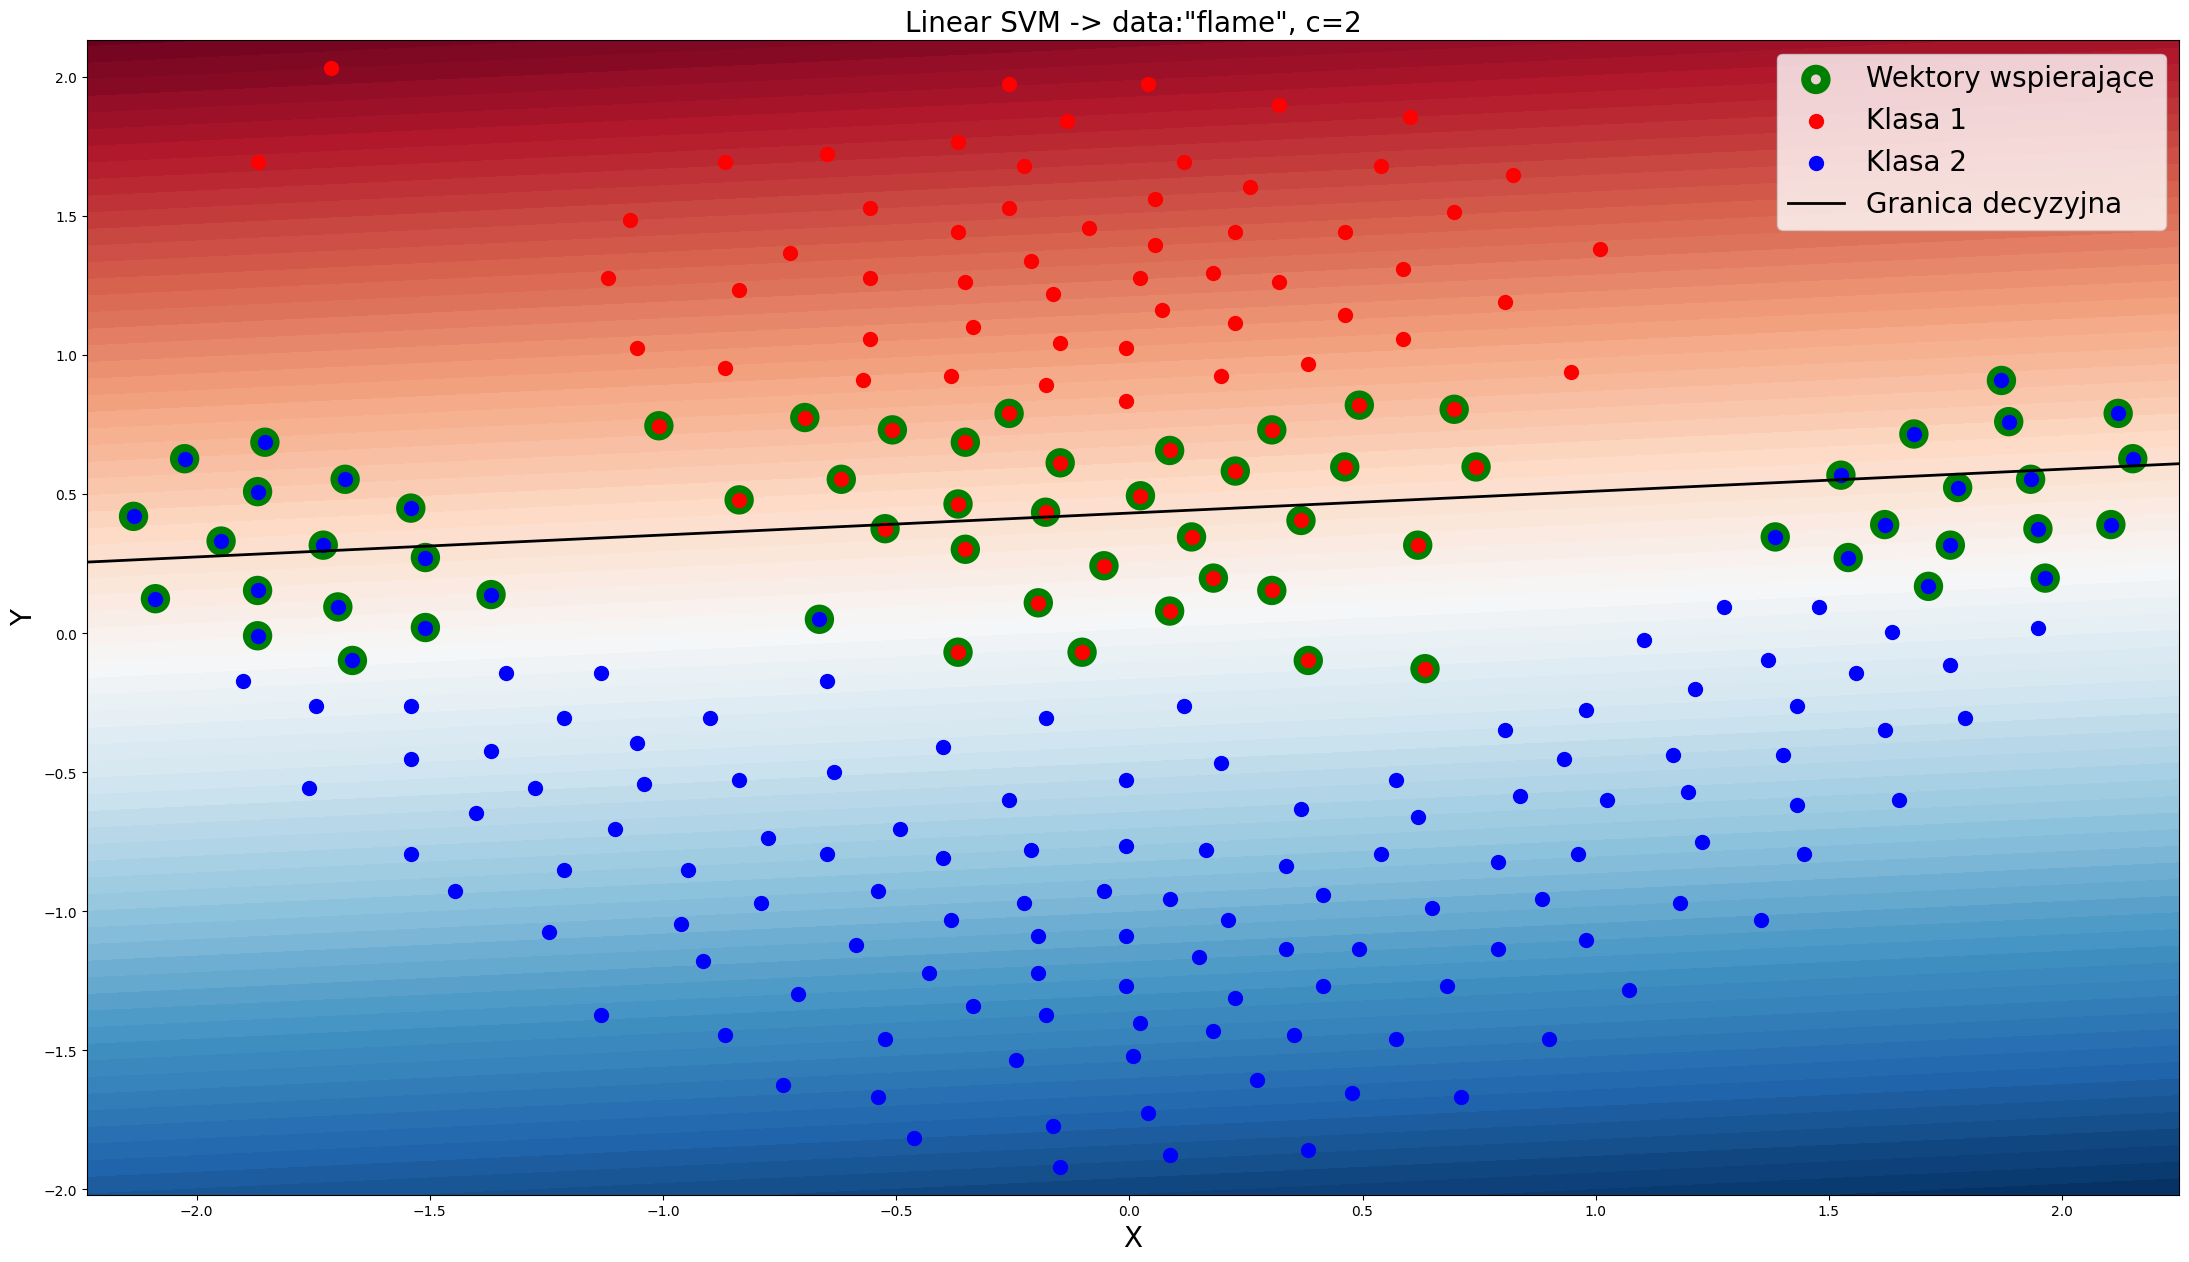

In [410]:
c_parameters=[0.01,0.1,1,2]
for c in c_parameters:
    show_linearSVM(jain,c,"jain")
for c in c_parameters:
    show_linearSVM(flame,c,"flame")